In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('H:\DataScience\Genesis Club\student_alcohol_consumption\student-mat.csv')
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [3]:
corr = df.corr()
print(corr)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   

<AxesSubplot:>

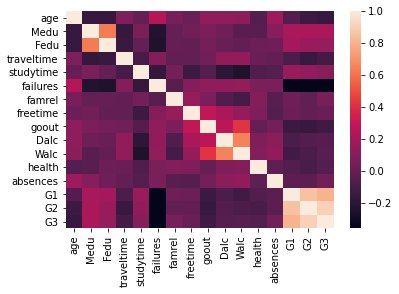

In [4]:
from matplotlib import pyplot as plot
import seaborn as sb

sb.heatmap(corr)


Since the columns are not correlated enough we cant make a model to predict grades of student.

But we can do a fancy visualisation of columns so lets do it!

<BarContainer object of 395 artists>

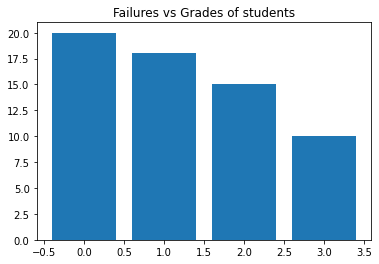

In [5]:
# Graph of failure vs grades
plot.title('Failures vs Grades of students')
plot.bar(df['failures'], df['G3'])


Well, from the graph we can conclude that students who fail less are more likely to get better grades


(array([105.,   0.,   0., 198.,   0.,   0.,  65.,   0.,   0.,  27.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

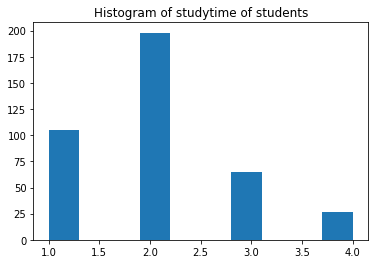

In [6]:
plot.title('Histogram of studytime of students')
plot.hist(df['studytime'])

The studytime of students is a normal distribution, where students who study for 2 to 5 hours of study per week is most common

([<matplotlib.patches.Wedge at 0xfb45852c10>,
 [Text(0.9338817003671446, 0.581261532977515, '4'),
  Text(-0.21299022062851278, 1.0791826378869416, '1'),
  Text(-1.0667347949276915, -0.26847137145434385, '3'),
  Text(0.6143059997160886, -0.9124845964249574, '2'),
  Text(1.0998608380449746, -0.017496769273385143, '0')],
 [Text(0.5093900183820789, 0.3170517452604627, '17.72%'),
  Text(-0.11617648397918877, 0.588645075211059, '20.76%'),
  Text(-0.5818553426878317, -0.14643892988418755, '30.89%'),
  Text(0.3350759998451392, -0.4977188707772494, '30.13%'),
  Text(0.599924093479077, -0.00954369233093735, '0.51%')])

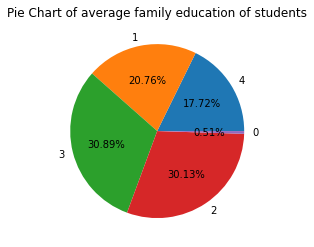

In [7]:
fam = {}
for i in range(len(df['Medu'])):
    avg_edu = (df['Medu'][i] + df['Fedu'][i]) // 2
    fam[avg_edu] = fam.get(avg_edu, 0) + 1

plot.title('Pie Chart of average family education of students')
plot.pie(fam.values(), labels=fam.keys(), autopct="%.2f%%")

Most of the students parents have completed secendary education

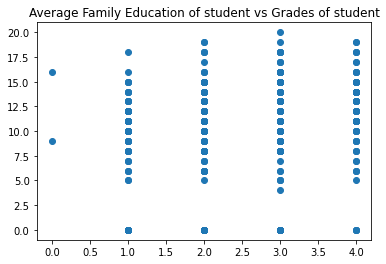

In [8]:
family_education = []
for i in range(len(df['Medu'])):
    avg_edu = (df['Medu'][i] + df['Fedu'][i]) // 2
    family_education.append(avg_edu)

plot.title('Average Family Education of student vs Grades of student')
plot.scatter(family_education, df['G3'])


The family background has no relation with the grades of student.

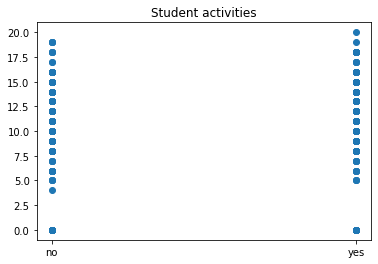

In [12]:
plot.title('Student activities')
plot.scatter(df['activities'], df['G3'])


Here we can see that there is no relation between extra curricular activies to grades of students

So students can opt for extra curricular activities to lighten up from academis stress

<BarContainer object of 2 artists>

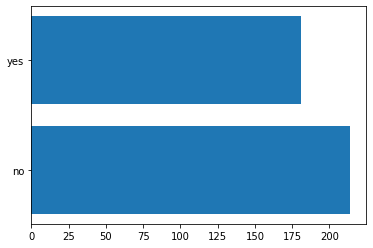

In [10]:
paid_students = {}
for val in df['paid']:
    paid_students[val] = paid_students.get(val, 0) + 1

plot.barh(tuple(paid_students.keys()), tuple(paid_students.values()))

So roughly half of the students pay for extra classes which indicates these are dsome dedicated students

~~or that the teachers teach poorly~~